Fazendo uso do DataSet Adult: https://archive.ics.uci.edu/dataset/2/adult


O Objetivo é analisar os dados do dataset, excluir os outliers, realizar as minerações e correção dos dados para apresentar em gráficos os resultados e possíveis identificações com bases neles.

IMPORTANDO OS PACOTES PARA TRAZER O DATASET:

In [ ]:
pip install ucimlrepo

In [ ]:
#Importando o Dataset:
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

print(adult.metadata)
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
dataset = pd.DataFrame(X)
print(dataset.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

In [ ]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Existem colunas que podem ser retiradas pelo motivo que não vão alterar os dados, e que os seus dados não serão usados na análise.


In [ ]:
print(dataset['capital-loss'])

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    0
Name: capital-loss, Length: 48842, dtype: int64


In [ ]:
#Deletando a coluna 'Capital Loss'
del dataset['capital-loss']

In [ ]:
#Reexibindo o dataset para conferir a exclusão da coluna
print(dataset.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  hours-per-week native-country  
0          2174              40  United-States  
1             0              13  United-States  
2             0              40  Un

In [ ]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,99.000000


In [ ]:
#Não há necessidade também da coluna fnlwgt
del dataset['fnlwgt']

In [ ]:
#Aproveitando um recurso próprio do Colab,
#ele gera alguns modelos prontos de gráficos
dataset.describe()

,age,education-num,capital-gain,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,40.422382
std,13.710510,2.570973,7452.019058,12.391444
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


array([[<Axes: title={'center': 'age'}>]], dtype=object)

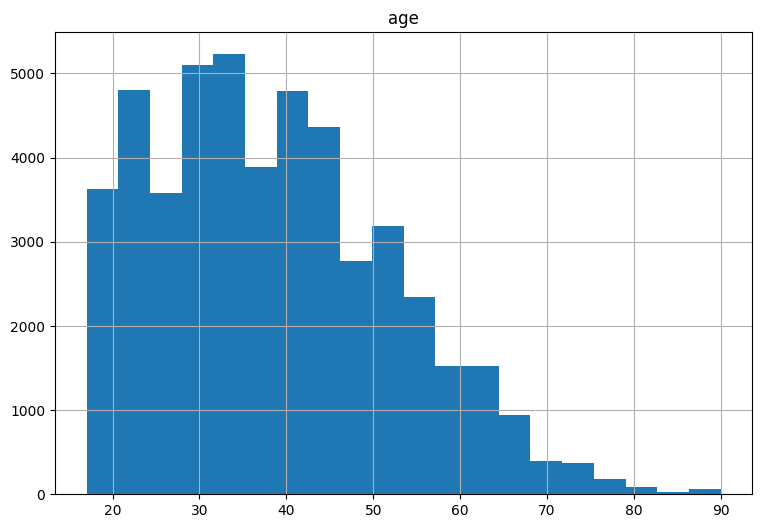

In [ ]:
#Criando a tabela que mostra a média de ganhos por idade:
dataset.hist(column='age', figsize=(9,6), bins=20)

Como o foco do DataSet é em adultos, julgo que não há necessidade de ter dados de pessoas com mais de 70 anos.

In [ ]:
limite_idade = 70
dataset_filtrado_idade = dataset[dataset['age']<= limite_idade]
print(dataset.head())

   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   hours-per-week native-country  
0              40  United-States  
1              13  United-States  
2              40  United-States  
3     

array([[<Axes: title={'center': 'age'}>]], dtype=object)

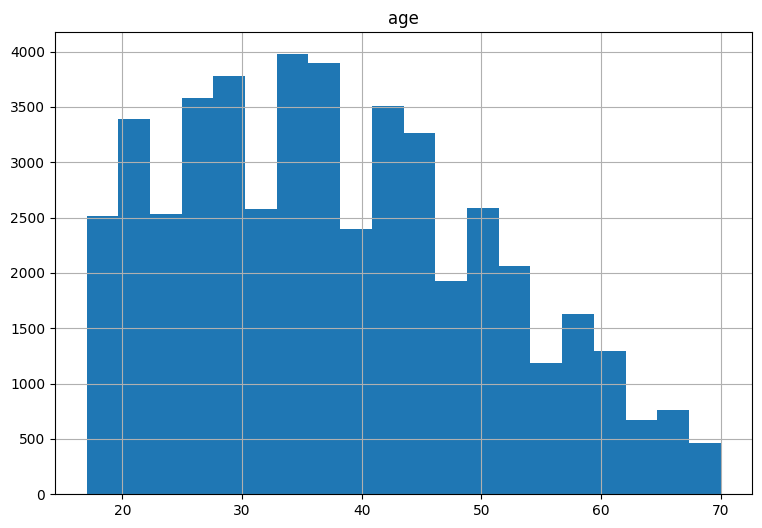

In [ ]:
#Criando a nova tabela que mostra a média de ganhos por idade(Filtrado até 70 anos):
dataset_filtrado_idade.hist(column='age', figsize=(9,6), bins=20)

In [ ]:
#Conferindo o tipo das colunas do dataset:
dataset_filtrado_idade.dtypes
dataset_filtrado_idade.describe()

,age,education-num,capital-gain,hours-per-week
count,47974.000000,47974.000000,47974.000000,47974.000000
mean,37.964439,10.095635,1069.300017,40.668987
std,12.843154,2.548989,7434.969535,12.165919
min,17.000000,1.000000,0.000000,1.000000
25%,27.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,45.000000
max,70.000000,16.000000,99999.000000,99.000000


In [ ]:
print(dataset_filtrado_idade['capital-gain'])

0        2174
1           0
2           0
3           0
4           0
         ... 
48837       0
48838       0
48839       0
48840    5455
48841       0
Name: capital-gain, Length: 47974, dtype: int64


In [ ]:
dfcatname = dataset_filtrado_idade.dtypes[dataset_filtrado_idade.dtypes == 'object'].index
dfcatname

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [ ]:
# Extraindo variáveis do tipo numéricas contínuas
dfconname = [item for item in list(dataset_filtrado_idade.columns) if item not in list(dfcatname)]
dfconname

['age', 'education-num', 'capital-gain', 'hours-per-week']

In [ ]:
# Descrevendo as variáveis categóricas
dataset_filtrado_idade[dfcatname].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,47085,47974,47974,47082,47974,47974,47974,47702
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33559,15508,21936,6086,19294,40980,32079,43036


In [ ]:
# Coletando estatísticas das colunas
dataset_filtrado_idade.describe()

,age,education-num,capital-gain,hours-per-week
count,47974.000000,47974.000000,47974.000000,47974.000000
mean,37.964439,10.095635,1069.300017,40.668987
std,12.843154,2.548989,7434.969535,12.165919
min,17.000000,1.000000,0.000000,1.000000
25%,27.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,45.000000
max,70.000000,16.000000,99999.000000,99.000000


In [ ]:
# Descrevendo a coluna capital-gain
dataset_filtrado_idade['capital-gain'].describe()

count    47974.000000
mean      1069.300017
std       7434.969535
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [ ]:
dataset_filtrado_idade['capital-gain'].isnull().sum()

0

In [ ]:
#Calcula a média de ganhos, e média de idades:
media_capital_gain = dataset_filtrado_idade['capital-gain'].mean()
media_ages = dataset_filtrado_idade['age'].mean()
print(media_capital_gain, media_ages)

1069.3000166756992 37.96443907116355


<Axes: >

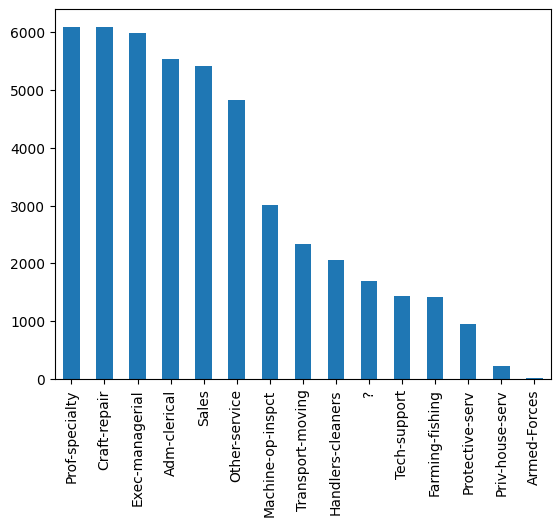

In [ ]:
dataset_filtrado_idade['occupation'].value_counts().plot(kind='bar')

Ao exibir o Gráfico, percebo que há uma opção preenchida com " ? " .

Para fins de exibição, irei substituir pelo nome "Não informado"

<ipython-input-47-09ec8c66fd81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtrado_idade['occupation'] = dataset_filtrado_idade['occupation'].replace("?", "Desconhecido/Não informado")


<Axes: >

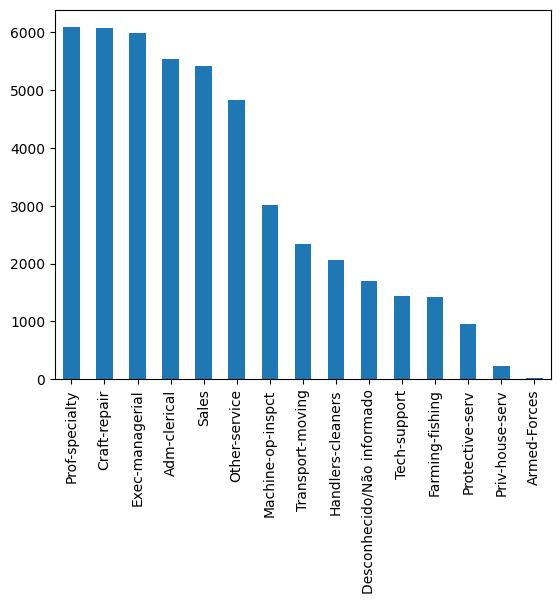

In [ ]:
#Corrigindo "?" por "Desconhecido/Não Informado"
dataset_filtrado_idade['occupation'] = dataset_filtrado_idade['occupation'].replace("?", "Desconhecido/Não informado")
dataset_filtrado_idade['occupation'].value_counts().plot(kind='bar')

In [ ]:
dataset_filtrado_idade.describe()
dataset_filtrado_idade.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba


In [ ]:
#Conferindo os itens que aparece na coluna para corrigir:
dataset_filtrado_idade['sex'].unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
dataset_filtrado_idade['race'].unique()


array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [ ]:
dataset_filtrado_idade['native-country'].unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Columbia', 'Ireland',
       'Hungary', 'Holand-Netherlands', nan], dtype=object)

In [ ]:
#Corrigindo " ? " por "Desconhecido"
dataset_filtrado_idade['native-country'] = dataset_filtrado_idade['native-country'].replace("?", "Desconhecido/Não informado")


<ipython-input-56-ff6a1c3de3eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtrado_idade['native-country'] = dataset_filtrado_idade['native-country'].replace("?", "Desconhecido/Não informado")


In [ ]:
#Conferindo se a mudança ocorreu corretamente.
dataset_filtrado_idade['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India',
       'Desconhecido/Não informado', 'Mexico', 'South', 'Puerto-Rico',
       'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines',
       'Italy', 'Poland', 'Cambodia', 'Thailand', 'Ecuador', 'Laos',
       'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador',
       'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Columbia', 'Ireland',
       'Hungary', 'Holand-Netherlands', nan], dtype=object)

In [ ]:
education_gain = dataset_filtrado_idade.groupby('education')['capital-gain'].mean().reset_index()

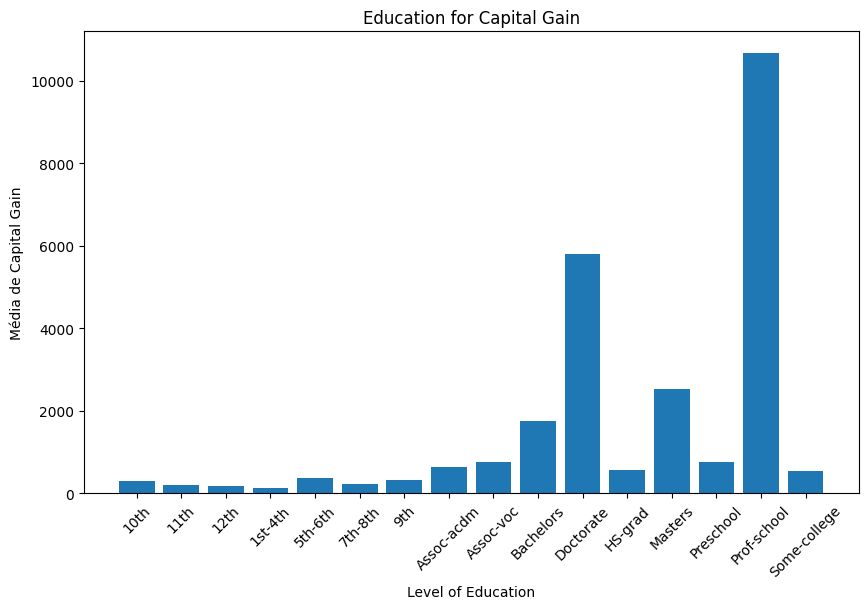

In [ ]:
#gráfico de barras Educação por Renda
plt.figure(figsize=(10, 6))
plt.bar(education_gain['education'], education_gain['capital-gain'])
plt.xlabel('Level of Education')
plt.ylabel('Média de Capital Gain')
plt.title('Education for Capital Gain')
plt.xticks(rotation=45)
# Rotaciona os rótulos no eixo x para melhor leitura
plt.show()

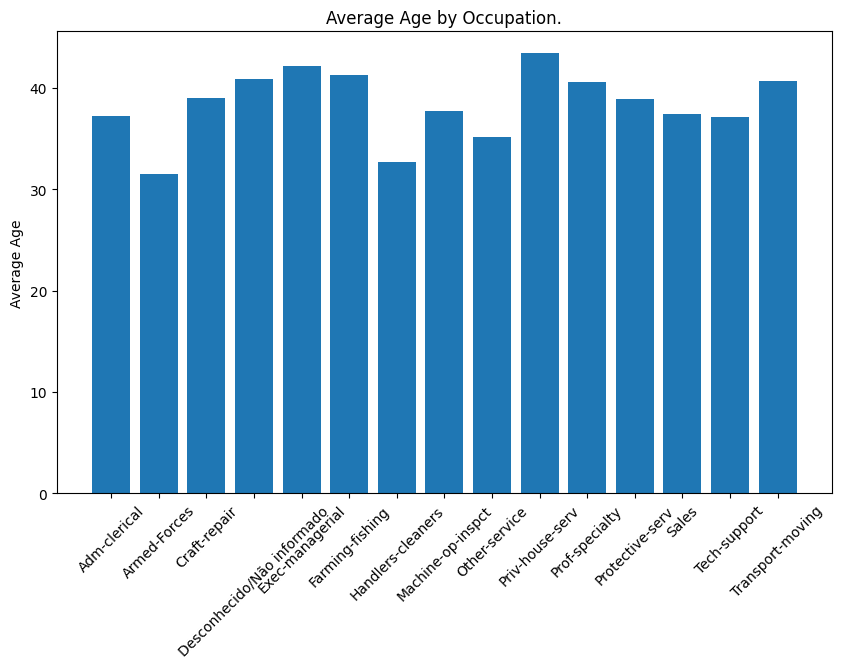

In [ ]:
occupation_age = dataset.groupby('occupation')['age'].mean().reset_index()

# Cria o gráfico de barras de relação da média de idades por ocupação.
plt.figure(figsize=(10, 6))
plt.bar(occupation_age['occupation'], occupation_age['age'])

plt.ylabel('Average Age')
plt.title('Average Age by Occupation.')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor leitura

# Exiba o gráfico
plt.show()

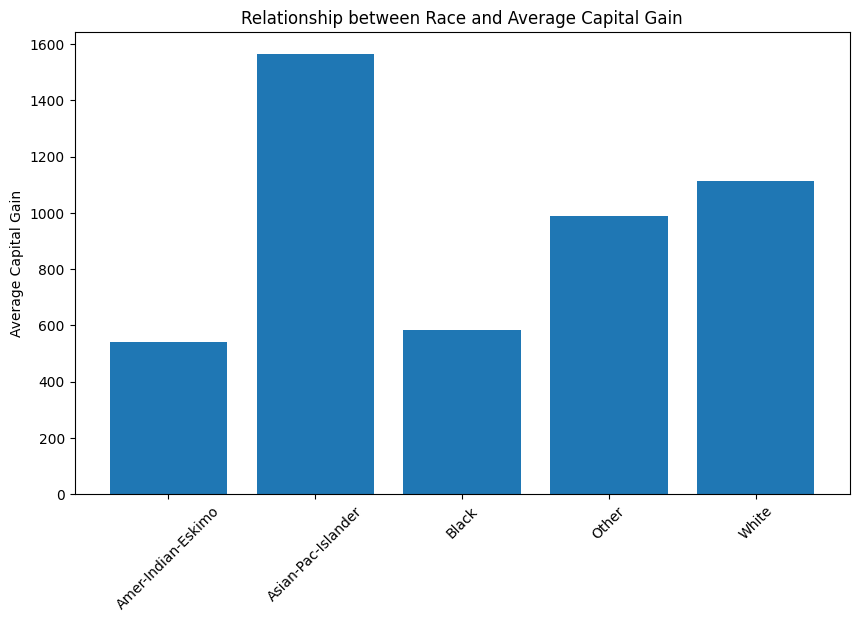

In [ ]:
race_earnings = dataset_filtrado_idade.groupby('race')['capital-gain'].mean().reset_index()

#Gráfico Ganhos por Raça
plt.figure(figsize=(10, 6))
plt.bar(race_earnings['race'], race_earnings['capital-gain'])

plt.ylabel('Average Capital Gain')
plt.title('Relationship between Race and Average Capital Gain')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor leitura

# Exiba o gráfico
plt.show()

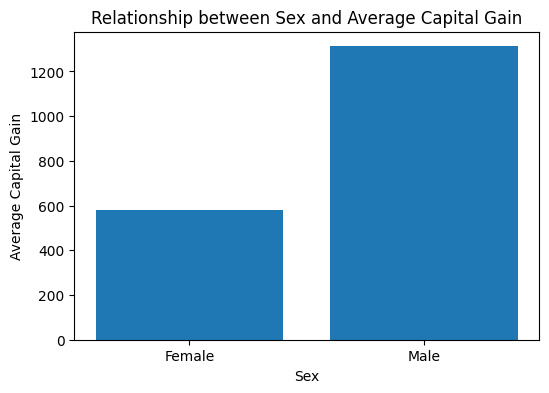

In [ ]:
sex_earnings = dataset_filtrado_idade.groupby('sex')['capital-gain'].mean().reset_index()

# Crie o gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(sex_earnings['sex'], sex_earnings['capital-gain'])
plt.xlabel('Sex')
plt.ylabel('Average Capital Gain')
plt.title('Relationship between Sex and Average Capital Gain')

# Exiba o gráfico
plt.show()

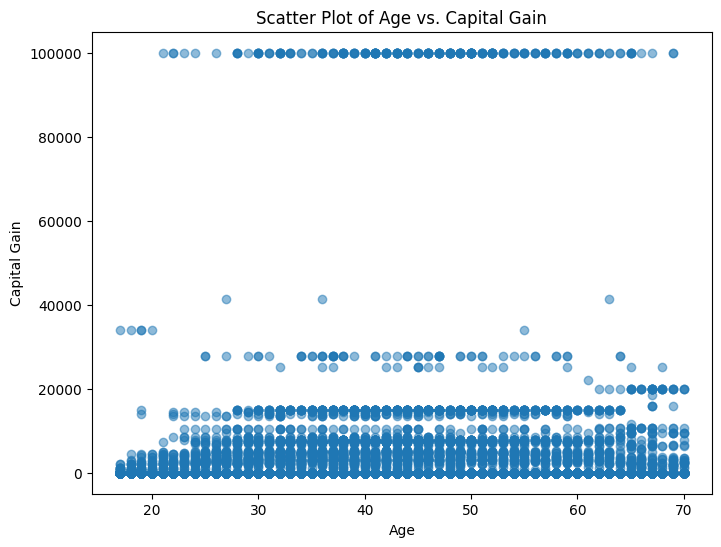

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset_filtrado_idade['age'], dataset_filtrado_idade['capital-gain'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.title('Scatter Plot of Age vs. Capital Gain')

# Exiba o gráfico de dispersão
plt.show()

Ao fazer o gráfico de dispersão encontro um Outlier, de pessoas que ganham muito acima da média dos outros participantes do data set, para descartar, estabeleço 70000 como um novo limite.

In [ ]:
limite_ganhos = 70000

In [ ]:
dataset_filtro_ganhos = dataset_filtrado_idade[dataset_filtrado_idade['capital-gain']<= limite_ganhos]
print(dataset_filtro_ganhos.head())

   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   hours-per-week native-country  
0              40  United-States  
1              13  United-States  
2              40  United-States  
3     

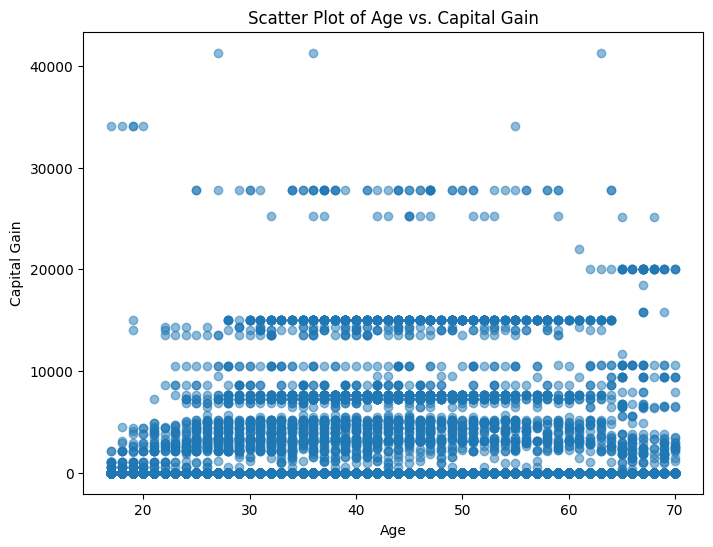

In [ ]:
#Refazendo o gráfico, dessa vez com o filtro de capital gain em 70000:
plt.figure(figsize=(8, 6))
plt.scatter(dataset_filtro_ganhos['age'], dataset_filtro_ganhos['capital-gain'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.title('Scatter Plot of Age vs. Capital Gain')

# Exiba o gráfico de dispersão
plt.show()

Para essa nova situação, não vejo a necessidade de retirar os que se encontram entre 30 e 40 mil, pois não são poucos pontos, e retratam a diferença social entre os ganhos de capital

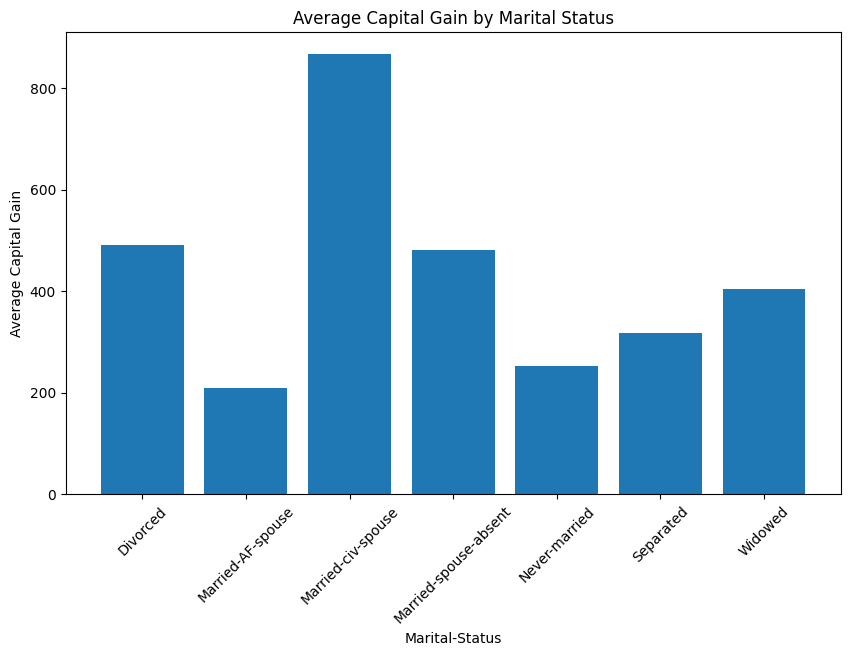

In [ ]:
marital_status_gain = dataset_filtro_ganhos.groupby('marital-status')['capital-gain'].mean().reset_index()

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(marital_status_gain['marital-status'], marital_status_gain['capital-gain'])
plt.xlabel('Marital-Status')
plt.ylabel('Average Capital Gain')
plt.title('Average Capital Gain by Marital Status')
plt.xticks(rotation=45)
# Rotaciona os rótulos no eixo x para melhor leitura
# Gráfico da média de ganhos por status relacional
# Exiba o gráfico de barras
plt.show()